In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

## ER随机网络的结构特性

### 绘制不同规模随机网络的度分布

In [17]:
# 定义求度分布的函数
def get_pdf(G, kmin, kmax):
    k = list(range(kmin, kmax+1))
    N = len(G.nodes())
    
    Pk = []
    
    for ki in k:
        c = 0
        for node in G.nodes():
            if G.degree(node) == ki:
                c+=1
        Pk.append(c/N)
    
    return k, Pk

In [18]:
samples = 100 # 统计平均
N = [100, 1000]
kmin, kmax, avk = 20, 80, 50
s1 = np.zeros(kmax-kmin+1)
s2 = np.zeros(kmax-kmin+1)
for i in range(samples):
    ER1 = nx.gnp_random_graph(N[0], avk/N[0])
    x1, y1 = get_pdf(ER1, kmin, kmax)
    ER2 = nx.gnp_random_graph(N[1], avk/N[1])
    x2, y2 = get_pdf(ER2, kmin, kmax)
    
    s1 += np.array(y1)
    s2 += np.array(y2)
    
    
# 计算二项分布理论值
n = 100
p = 0.5
k = np.arange(20, 81)
pk_b = stats.binom.pmf(k, n, p)

# 计算泊松分布理论值
pk_p = [np.exp(-avk)*(avk**ki)/math.factorial(ki) for ki in range(kmin, kmax+1)]

(20.0, 80.0)

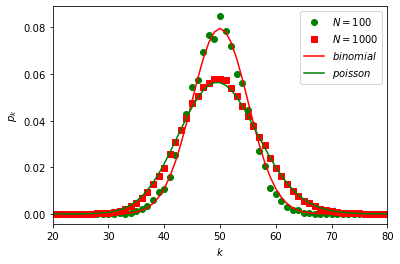

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(x1, s1/samples, 'go', label = '$N = 100$')
plt.plot(x2, s2/samples, 'rs', label = '$N = 1000$')
plt.plot(x1, pk_b, 'r-', label = '$binomial$')
plt.plot(x2, pk_p, 'g-', label = '$poisson$')
plt.legend(loc=0)
plt.xlabel('$k$')
plt.ylabel('$p_k$')
plt.xlim([20, 80])

## 编程实践: 测量, 绘制真实网络的度分布

In [26]:
import pandas as pd
from decimal import Decimal

In [48]:
# 加载真实数据库: 科学合作网络
df1 = pd.read_csv("data/citation.csv")
G1 = nx.from_pandas_edgelist(df1, 'sourceId', 'targetId', create_using = nx.Graph())

In [49]:
deg1 = [G1.degree(node) for node in G1.nodes()]
kmin1, kmax1 = min(deg1), max(deg1)

In [52]:
k1, Pk1 = get_pdf(G1, kmin1, kmax1)

In [55]:
# 绘制度分布

# 计算平均度值, 并绘制泊松分布
avk1 = sum(deg1)/len(G1.nodes())
pk_p1 = [Decimal(np.exp(-avk1))*(Decimal(avk1)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin1, kmax1+1)]


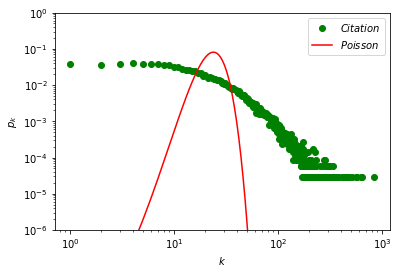

In [56]:
plt.figure(figsize=(6, 4))
plt.plot(k1, Pk1, 'go', label = '$Citation$')
plt.plot(k1, pk_p1, 'r-', label = '$Poisson$')
plt.legend(loc=0)
plt.xlabel('$k$')
plt.ylabel('$p_k$')
plt.ylim([1e-6, 1])
plt.xscale("log")
plt.yscale("log")

## 计算ER随机网络的平均最短路径长度和平均集聚系数

In [ ]:
def cal_by_networkx(samples, N):
    avl, clu = [], []
    t_avl, t_clu = [], []
    for n in N:
        p = 10/n
        avl0 = 0
        clu = 0
        t_avl0 = 0